In [31]:
import pandas as pd 
import geopandas as gpd
income_data = pd.read_csv("/home/ryanwonhail/project-2-group-real-estate-industry-project-34/data/raw/ABS_Income_including_government_allowances_by_2021_SA2_Nov_2023_correct.csv")
sf = gpd.read_file("/home/ryanwonhail/project-2-group-real-estate-industry-project-34/data/SA2 Zones/SA2_2021_AUST_GDA2020.shp")


In [32]:
income_data.count()

OBJECTID                                                                            2473
Statistical Areas Level 2 2021 code                                                 2473
Statistical Areas Level 2 2021 name                                                 2473
Area in square kilometres                                                           2454
Uniform Resource Identifier                                                         2473
                                                                                    ... 
Equivalised total household income: Partial income stated (%) (Data year: 2021)     2341
Equivalised total household income: All incomes not stated (%) (Data year: 2021)    2332
globalid                                                                            2473
Shape__Area                                                                         2454
Shape__Length                                                                       2454
Length: 79, dtype: in

In [33]:
income_data.shape
income_data.columns


income test
test


In [34]:
# Check the number of null values in the 'income' column
null_values = income_data.isnull().sum().nlargest(10)
print(null_values)
max_null_values = income_data.isnull().sum().max()
print(max_null_values)


Personal income: Median investment income ($) (Data year: 2020)                                                                  512
Personal income: Total income (excl. Government pensions and allowances): p10/P50 ratio (Data year: 2020)                        491
Personal income: Total income (excl. Government pensions and allowances): Income share of top 1% of earners (Data year: 2020)    485
Personal income: Total superannuation and annuity income ($m) (Data year: 2020)                                                  470
Personal income: Superannuation and annuity income as main source of income (%) (Data year: 2020)                                467
Personal income: Superannuation and annuity income earners (no.) (Data year: 2020)                                               466
Personal income: Superannuation and annuity income earners: Median age (years) (Data year: 2020)                                 466
Personal income: Median superannuation and annuity income ($) (Data y

In [35]:
missing_percentage = income_data.isnull().mean() * 100


high_missing_cols = missing_percentage[missing_percentage > 50]  
print(high_missing_cols)

Series([], dtype: float64)


In [36]:
income_data_cleaned = income_data.dropna()

In [37]:
null_values_clean = income_data_cleaned.isnull().sum()
null_values_clean

OBJECTID                                                                            0
Statistical Areas Level 2 2021 code                                                 0
Statistical Areas Level 2 2021 name                                                 0
Area in square kilometres                                                           0
Uniform Resource Identifier                                                         0
                                                                                   ..
Equivalised total household income: Partial income stated (%) (Data year: 2021)     0
Equivalised total household income: All incomes not stated (%) (Data year: 2021)    0
globalid                                                                            0
Shape__Area                                                                         0
Shape__Length                                                                       0
Length: 79, dtype: int64

In [38]:
income_data_cleaned.head(2)
income_data_cleaned.columns
#1680 Southbank
#877 CBD

Index(['OBJECTID', 'Statistical Areas Level 2 2021 code',
       'Statistical Areas Level 2 2021 name', 'Area in square kilometres',
       'Uniform Resource Identifier',
       'Personal income: Employee income earners (no.) (Data year: 2020)',
       'Personal income: Employee income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total employee income ($m) (Data year: 2020)',
       'Personal income: Median employee income ($) (Data year: 2020)',
       'Personal income: Mean employee income ($) (Data year: 2020)',
       'Personal income: Employee income as main source of income (%) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners (no.) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total own unincorporated business income ($m) (Data year: 2020)',
       'Personal income: Median own unincorporated business income (

In [39]:
# Merge the two dataframes on the common column 'SA2_CODE21'
sf.rename(columns={'SA2_CODE21': 'Statistical Areas Level 2 2021 code'}, inplace=True)
merged_df = sf.merge(income_data_cleaned, how='inner', on='Statistical Areas Level 2 2021 code')


merged_df.count()
merged_df['STE_NAME21'].unique()
merged_df[merged_df['STE_NAME21']== "Victoria"].count()


Statistical Areas Level 2 2021 code                                                 312
SA2_NAME21                                                                          312
CHG_FLAG21                                                                          312
CHG_LBL21                                                                           312
SA3_CODE21                                                                          312
                                                                                   ... 
Equivalised total household income: Partial income stated (%) (Data year: 2021)     312
Equivalised total household income: All incomes not stated (%) (Data year: 2021)    312
globalid                                                                            312
Shape__Area                                                                         312
Shape__Length                                                                       312
Length: 95, dtype: int64

In [40]:
victoria_income = merged_df[merged_df['STE_NAME21'] == 'Victoria']
victoria_income.shape


(312, 95)

In [41]:

columns_to_drop = ['SA2_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'SA3_CODE21', 'SA3_NAME21', 
                   'SA4_CODE21', 'SA4_NAME21', 'GCC_CODE21', 'GCC_NAME21', 'STE_CODE21', 
                   'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 
                   'geometry', 'OBJECTID']


victoria_income_cleaned = victoria_income.drop(columns=columns_to_drop)

victoria_income_cleaned.columns


Index(['Statistical Areas Level 2 2021 code',
       'Statistical Areas Level 2 2021 name', 'Area in square kilometres',
       'Uniform Resource Identifier',
       'Personal income: Employee income earners (no.) (Data year: 2020)',
       'Personal income: Employee income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total employee income ($m) (Data year: 2020)',
       'Personal income: Median employee income ($) (Data year: 2020)',
       'Personal income: Mean employee income ($) (Data year: 2020)',
       'Personal income: Employee income as main source of income (%) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners (no.) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total own unincorporated business income ($m) (Data year: 2020)',
       'Personal income: Median own unincorporated business income ($) (Data yea

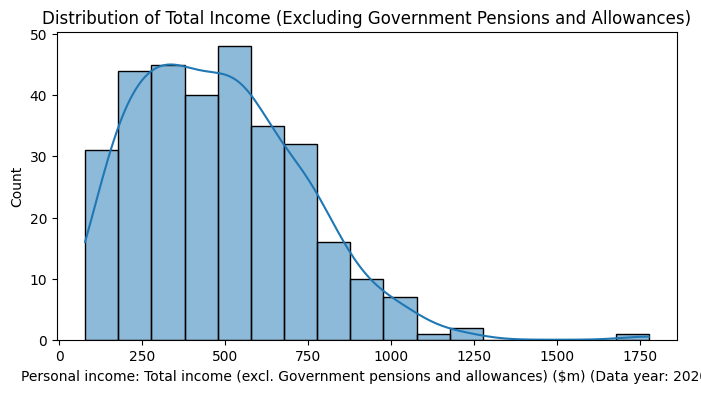

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.histplot(victoria_income_cleaned['Personal income: Total income (excl. Government pensions and allowances) ($m) (Data year: 2020)'], kde=True)
plt.title('Distribution of Total Income (Excluding Government Pensions and Allowances)')
plt.show()


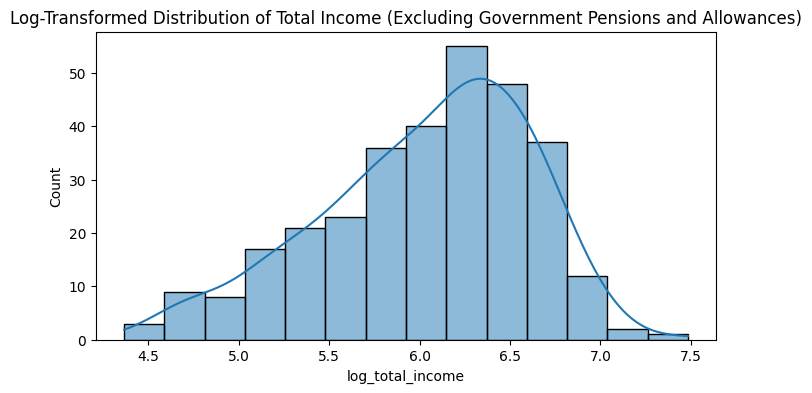

In [43]:
# Apply log transformation to the target variable
victoria_income_cleaned['log_total_income'] = np.log(victoria_income_cleaned['Personal income: Total income (excl. Government pensions and allowances) ($m) (Data year: 2020)'] + 1)

# Check the distribution of the log-transformed target
plt.figure(figsize=(8, 4))
sns.histplot(victoria_income_cleaned['log_total_income'], kde=True)
plt.title('Log-Transformed Distribution of Total Income (Excluding Government Pensions and Allowances)')
plt.show()


In [44]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel


numeric_columns = victoria_income_cleaned.select_dtypes(include=[np.number]).columns
X_victoria = victoria_income_cleaned[numeric_columns]

scaler = StandardScaler()
X_scaled_victoria = scaler.fit_transform(X_victoria)

# Create a proxy target based on total income as there is no affluence level 
#y_victoria = victoria_income_cleaned['log_total_income']
y_victoria = victoria_income_cleaned['Personal income: Total income (excl. Government pensions and allowances) ($m) (Data year: 2020)']


In [50]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled_victoria, y_victoria, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Use SelectFromModel to select the most important features
selector = SelectFromModel(rf_regressor, threshold="median", prefit=True)
X_selected_train = selector.transform(X_train)
X_selected_test = selector.transform(X_test)


selected_features = numeric_columns[selector.get_support()]
# It is the list of selected features 
selected_features


Index(['Area in square kilometres',
       'Personal income: Employee income earners (no.) (Data year: 2020)',
       'Personal income: Employee income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total employee income ($m) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners (no.) (Data year: 2020)',
       'Personal income: Own unincorporated business income earners: Median age (years) (Data year: 2020)',
       'Personal income: Total own unincorporated business income ($m) (Data year: 2020)',
       'Personal income: Median own unincorporated business income ($) (Data year: 2020)',
       'Personal income: Mean own unincorporated business income ($) (Data year: 2020)',
       'Personal income: Own unincorporated business income as main source of income (%) (Data year: 2020)',
       'Personal income: Investment income earners (no.) (Data year: 2020)',
       'Personal income: Total investment income ($m) (Data year: 202

In [51]:
# I want to train the model with selected features
final_rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf_regressor.fit(X_selected_train, y_train)
y_pred = final_rf_regressor.predict(X_selected_test)
X_selected_victoria = selector.transform(X_scaled_victoria)
#so the affluence score will be based off total income
victoria_income_cleaned['affluence_score'] = final_rf_regressor.predict(X_selected_victoria)


In [52]:
# Group by suburb and calculate the average affluence score by suburb
affluence_by_suburb_victoria = victoria_income_cleaned.groupby('Statistical Areas Level 2 2021 name')['affluence_score'].mean().reset_index()

#This is to sort by affluence score and display the top suburbs
affluence_by_suburb_victoria_sorted = affluence_by_suburb_victoria.sort_values(by='affluence_score', ascending=False)
affluence_by_suburb_victoria_sorted.head(10)


,Statistical Areas Level 2 2021 name,affluence_score
221,Port Melbourne,1149.204
23,Bentleigh - McKinnon,1146.267
277,Toorak,1098.955
129,Hawthorn East,1092.383
92,Elwood,1057.069
278,Torquay,1044.088
27,Blackburn,1033.554
185,Mordialloc - Parkdale,1021.056
202,Newport,1013.711
133,Highett (East) - Cheltenham,1003.102


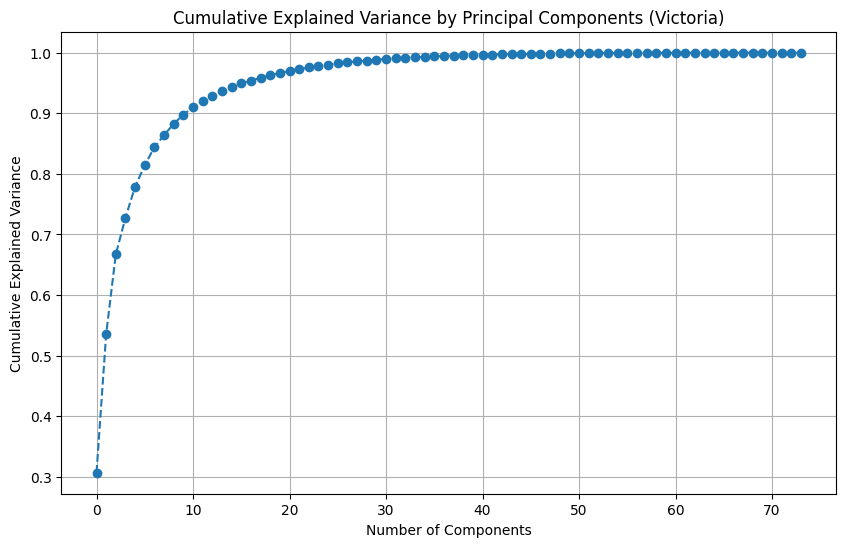

Number of components explaining 90% variance: 11
